In [916]:
# Importer les packages

In [917]:
# Imp
#Étape 1 : Importer les packages
#Étape 2 : Charger les données
#Étape 3 : Analyse de données
#Étape 4 : Pretraitement des donnees
#Étape 5 : Diviser les donnees : Train et Test
#Étape 6 : Selection au moins 4 Algorithms de Machine Learning
#Étape 7 : Evaluer les modèles
#Étape 8 : Faire une simple prediction

In [918]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [919]:
# Charger les données
data = pd.read_csv('Book1.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [920]:
data.head(2000)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,32,blue-collar,married,secondary,no,120,yes,yes,unknown,9,may,214,3,-1,0,unknown,no
1996,43,blue-collar,single,primary,no,0,no,no,unknown,9,may,71,3,-1,0,unknown,no
1997,34,admin.,divorced,primary,no,9569,yes,no,unknown,9,may,43,2,-1,0,unknown,no
1998,35,self-employed,married,secondary,no,351,yes,no,unknown,9,may,298,2,-1,0,unknown,no


In [921]:
data.shape

(45211, 17)

In [922]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [923]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [924]:
data.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [925]:
#pretaitement des données

In [926]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [927]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [928]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [929]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [930]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [931]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [932]:
data['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [933]:
data['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [934]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [935]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<Axes: >

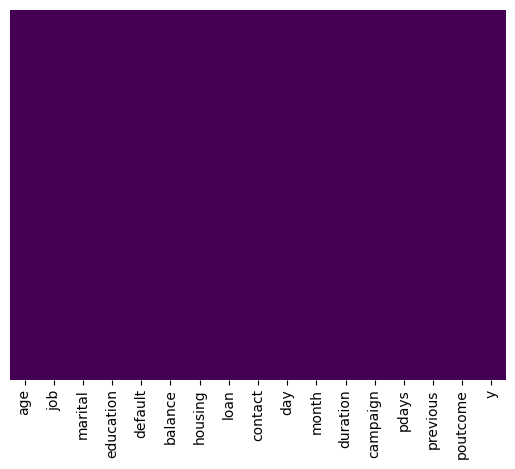

In [936]:
sns.heatmap(data.isnull(), yticklabels=False , cbar=False, cmap='viridis')

In [937]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [938]:
list_objets = ['job','marital','housing','default','loan', 'education', 'contact','month','poutcome','y']

In [939]:
#Creation du dictoinnaire pour le mapping

In [940]:
from sklearn.preprocessing import LabelEncoder

In [941]:
encoder = LabelEncoder()

In [942]:
for enc in list_objets:
    data[enc] = encoder.fit_transform(data[enc])

In [943]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Étape 5 : Diviser les donnees : Train et Test

In [945]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [946]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (27126, 16)
X_test: (18085, 16)
Y_train: (27126,)
Y_test: (18085,)


<Axes: >

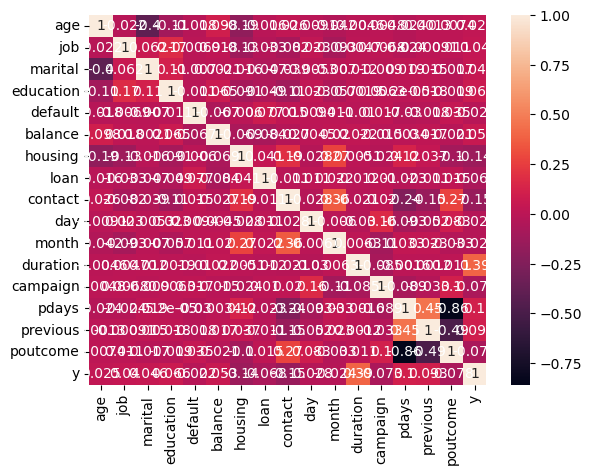

In [947]:
sns.heatmap(data.corr(), annot=True)

# Étape 6 : Selection au moins 4 Algorithms de Machine Learning #Étape 7 : Evaluer les modèles

In [949]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [950]:
model = RandomForestClassifier()

In [951]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [952]:
prediction = model.predict(X_test)

In [953]:
print(f"Accuracy: {accuracy_score(Y_test, prediction)}")

Accuracy: 0.9064970970417473


In [954]:
print("Accuracy de la RandomForest:", 100 * accuracy_score(Y_test, prediction))
print("MSE de la RandomForest:", mean_squared_error(Y_test, prediction))

Accuracy de la RandomForest: 90.64970970417473
MSE de la RandomForest: 0.0935029029582527


[[15513   474]
 [ 1217   881]]


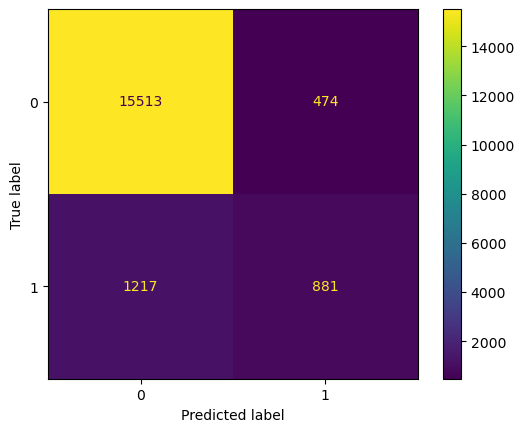

In [955]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(Y_test, prediction))
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

In [956]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (27126, 16)
X_test: (18085, 16)
Y_train: (27126,)
Y_test: (18085,)


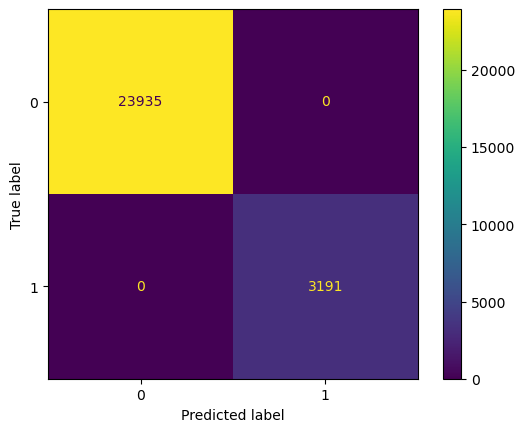

In [957]:
ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train)

In [958]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [959]:
print("Precision Score de la Régression logistique:", precision_score(Y_test, prediction))
print("Recall Score de la Régression logistique:", recall_score(Y_test, prediction))
print("F1-Score de la régression ligistique:", f1_score(Y_test, prediction))

Precision Score de la Régression logistique: 0.6501845018450184
Recall Score de la Régression logistique: 0.41992373689227835
F1-Score de la régression ligistique: 0.5102809151462496


In [960]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
#Entraiment
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [961]:
Y_pred_knn = model.predict(X_test)
#evaluation
print("Accuracy score of knn model", 100 * metrics.accuracy_score(Y_test, Y_pred_knn))
print("MSE of knn model", mean_squared_error(Y_test, Y_pred_knn))

Accuracy score of knn model 90.64970970417473
MSE of knn model 0.0935029029582527


In [962]:
#Selection du modele
from sklearn.svm import SVC
svc_model = SVC()
#Entrainemnt 
svc_model.fit(X_train, Y_train)

SVC()

In [963]:
#prediction 
Y_pred_svc = svc_model.predict(X_test)
#Evalutation
print("Accuracy score of svc model", 100 * metrics.accuracy_score(Y_test, Y_pred_svc))
print("MSE of svc model", mean_squared_error(Y_test, Y_pred_svc))

Accuracy score of svc model 88.38263754492674
MSE of svc model 0.11617362455073266


In [964]:
#Selection du modele
from sklearn.linear_model import LinearRegression
lr_model = LogisticRegression()

In [965]:
#Entrainement
lr_model.fit(X_train, Y_train)

C:\Users\DANH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [966]:
#Evalutation
print("Accuracy de la Regression logistique:", 100 * metrics.accuracy_score(Y_test, prediction))
print("MSE de la Regression logistique:", mean_squared_error(Y_test, prediction))

Accuracy de la Regression logistique: 90.64970970417473
MSE de la Regression logistique: 0.0935029029582527


In [967]:
#Étape 8 : Faire une simple prediction

In [968]:
subset = data[['duration', 'y']]
X = subset.iloc[:, :-1]
y = subset.iloc[:, -1]

In [969]:
X1

,duration
0,261
1,151
2,76
3,92
4,198
...,...
45206,977
45207,456
45208,1127
45209,508


In [970]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y2, test_size=0.4, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (27126, 16)
X_test: (18085, 16)
Y_train: (27126,)
Y_test: (18085,)


In [971]:
lr_model1 = LogisticRegression()

In [972]:
lr_model1.fit(X_train1, y_train1)

C:\Users\DANH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [978]:
pred = lr_model1.predict(X_test1)

In [980]:
print("Accuracy de la Regression logistique:", 100 * metrics.accuracy_score(y_test1, pred))
print("MSE de la Regression logistique:", mean_squared_error(y_test1, pred))

Accuracy de la Regression logistique: 88.92452308542993
MSE de la Regression logistique: 0.11075476914570086
